<a href="https://colab.research.google.com/github/nlei1/hdag-project/blob/main/HDAGFellowship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Setup**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
url = 'https://raw.githubusercontent.com/nlei1/hdag-project/main/tmpnw4b6msk.csv'
df = pd.read_csv(url)
from shapely.geometry import Point
!pip install geopandas
import geopandas as gpd
# map = pd.read_csv("Boston_Neighborhoods.csv")

     |████████████████████████████████| 994 kB 5.0 MB/s 
     |████████████████████████████████| 6.6 MB 10.7 MB/s 
     |████████████████████████████████| 15.4 MB 35 kB/s 


In [ ]:
df.head()

,dispatch_ts,mode_type,location_type,street,xstreet1,xstreet2,x_cord,y_cord,lat,long
0,2015-01-01 00:24:27+00,mv,Intersection,NaN,TRAIN ST,WESTGLOW ST,777243.68,2930930.11,42.289750,-71.052515
1,2015-01-01 03:50:33+00,mv,Street,RIVER ST,WALTER ST,WINTHROP ST,758927.71,2918981.60,42.257079,-71.120105
2,2015-01-01 10:14:13+00,ped,Intersection,NaN,LONDON ST,MERIDIAN ST,780725.19,2961410.17,42.373337,-71.039040
3,2015-01-01 18:23:57+00,bike,Intersection,NaN,OLNEY ST,INWOOD ST,772710.48,2936614.62,42.305413,-71.069163
4,2015-01-01 18:42:19+00,ped,Intersection,NaN,WASHINGTON ST,COLUMBUS AVE,764813.61,2940364.63,42.315809,-71.098290


In [ ]:
df['dispatch_ts'] = pd.to_datetime(df['dispatch_ts'])
df['dates'] = df['dispatch_ts'].dt.date
df['times'] = df['dispatch_ts'].dt.time
df['year'] = df['dispatch_ts'].dt.year
df['month'] = df['dispatch_ts'].dt.month
df['day'] = df['dispatch_ts'].dt.day
df['day_of_wk'] = df['dispatch_ts'].dt.day_name()
df

,dispatch_ts,mode_type,location_type,street,xstreet1,xstreet2,x_cord,y_cord,lat,long,dates,times,year,month,day,day_of_wk
0,2015-01-01 00:24:27+00:00,mv,Intersection,NaN,TRAIN ST,WESTGLOW ST,777243.68,2930930.11,42.289750,-71.052515,2015-01-01,00:24:27,2015,1,1,Thursday
1,2015-01-01 03:50:33+00:00,mv,Street,RIVER ST,WALTER ST,WINTHROP ST,758927.71,2918981.60,42.257079,-71.120105,2015-01-01,03:50:33,2015,1,1,Thursday
2,2015-01-01 10:14:13+00:00,ped,Intersection,NaN,LONDON ST,MERIDIAN ST,780725.19,2961410.17,42.373337,-71.039040,2015-01-01,10:14:13,2015,1,1,Thursday
3,2015-01-01 18:23:57+00:00,bike,Intersection,NaN,OLNEY ST,INWOOD ST,772710.48,2936614.62,42.305413,-71.069163,2015-01-01,18:23:57,2015,1,1,Thursday
4,2015-01-01 18:42:19+00:00,ped,Intersection,NaN,WASHINGTON ST,COLUMBUS AVE,764813.61,2940364.63,42.315809,-71.098290,2015-01-01,18:42:19,2015,1,1,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26822,2021-06-30 13:34:14+00:00,mv,Street,MORTON ST,LUCERNE ST,THEODORE ST,767216.56,2928648.01,42.283776,-71.089419,2021-06-30,13:34:14,2021,6,30,Wednesday
26823,2021-06-30 18:53:22+00:00,mv,Intersection,NaN,DUDLEY ST,WASHINGTON ST,768343.58,2945153.45,42.328903,-71.085153,2021-06-30,18:53:22,2021,6,30,Wednesday
26824,2021-06-30 21:47:21+00:00,mv,Intersection,NaN,ALBANY ST,MASSACHUSETTS AVE,771496.77,2946868.37,42.333566,-71.073460,2021-06-30,21:47:21,2021,6,30,Wednesday
26825,2021-06-30 22:06:03+00:00,mv,Street,HANCOCK ST,UPHAM AVE,WHEELOCK AVE,773595.37,2940209.99,42.315227,-71.066019,2021-06-30,22:06:03,2021,6,30,Wednesday


In [ ]:
# map.head()

# **Basic EDA**

In [ ]:
import folium
import math
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

m_3 = folium.Map(location=[42.378778, -71.120306], tiles='cartodbpositron', zoom_start=13)

# Add points to the map
mc = MarkerCluster()
for idx, row in df.iterrows():
    if not math.isnan(row['long']) and not math.isnan(row['lat']):
        mc.add_child(Marker([row['lat'], row['long']], popup=row['dispatch_ts']))
m_3.add_child(mc)

# Display the map
m_3

AttributeError: ignored

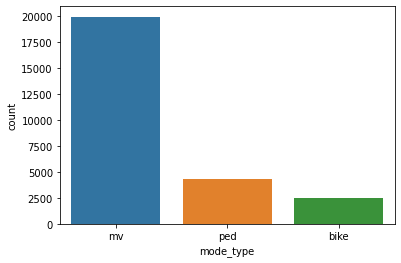

In [ ]:
sns.countplot(x="mode_type", data=df)


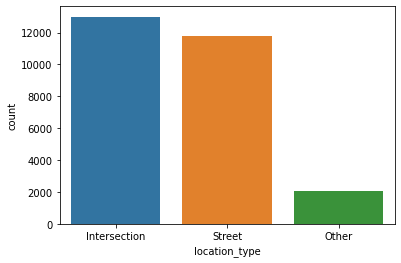

In [ ]:
sns.countplot(x="location_type", data=df)


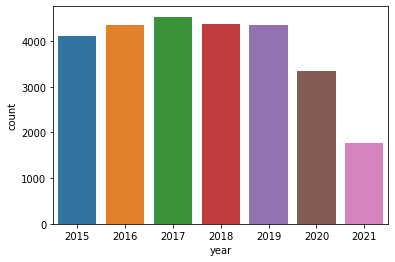

In [ ]:
sns.countplot(x="year", data=df)


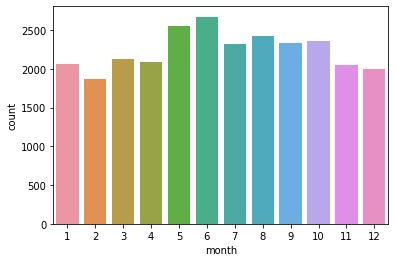

In [ ]:
sns.countplot(x="month", data=df)


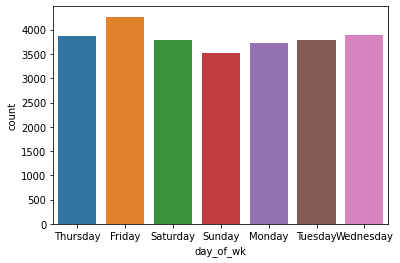

In [ ]:
sns.countplot(x="day_of_wk", data=df)


In [ ]:
countdf = df.groupby(by="dates").size().reset_index()
countdf = countdf.rename(columns={0: "count"})
ax.plot(countdf["dates"], countdf["count"])

NameError: ignored

In [ ]:
df["Geometry"] = df.apply(lambda x: Point((x.long, x.lat)), axis=1)
df.head()

important = df[["dispatch_ts", "lat", "long", "Geometry"]]
important.head()

,dispatch_ts,lat,long,Geometry
0,2015-01-01 00:24:27+00,42.289750,-71.052515,POINT (-71.05251532632529 42.2897498978002)
1,2015-01-01 03:50:33+00,42.257079,-71.120105,POINT (-71.12010537972741 42.25707875169221)
2,2015-01-01 10:14:13+00,42.373337,-71.039040,POINT (-71.0390395875703 42.3733372700896)
3,2015-01-01 18:23:57+00,42.305413,-71.069163,POINT (-71.06916302705758 42.30541254615279)
4,2015-01-01 18:42:19+00,42.315809,-71.098290,POINT (-71.09829029158308 42.3158085168013)


In [ ]:
important_crs = {'init': 'epsg:4326'}
important_geo = gpd.GeoDataFrame(important, crs = important_crs, geometry = important.Geometry)
del important_geo["Geometry"]
important_geo.head()

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,dispatch_ts,lat,long,geometry
0,2015-01-01 00:24:27+00,42.289750,-71.052515,POINT (-71.05252 42.28975)
1,2015-01-01 03:50:33+00,42.257079,-71.120105,POINT (-71.12011 42.25708)
2,2015-01-01 10:14:13+00,42.373337,-71.039040,POINT (-71.03904 42.37334)
3,2015-01-01 18:23:57+00,42.305413,-71.069163,POINT (-71.06916 42.30541)
4,2015-01-01 18:42:19+00,42.315809,-71.098290,POINT (-71.09829 42.31581)


In [ ]:
boston = gpd.read_file("/content/drive/hdag/Boston_Neighborhoods.geojson")

DriverError: ignored